# Anfangswertproblem
Numerische Lösung einer Differentialgleichung zweiter Ordnung

Created: 25.12.19 RW
Revision: 28.1.21
Status: works

In [1]:
###################################################
# packages
import numpy as np
from scipy.integrate import solve_ivp
from scipy.special import gamma, airy
import scipy.constants as co
import astropy as aco

import matplotlib.pyplot as plt
import mpl_toolkits.mplot3d.axes3d as p3
import matplotlib.animation as animation
from matplotlib import rcParams
rcParams['font.family'] = 'sans-serif'
rcParams['font.sans-serif'] = ['Tahoma']
rcParams['font.size'] = 20

######################################################
# functions
# Beispiel harmonischer Oszillator in 1D
def func(t, y):
    '''DGL 2. Ordnung als 2D system erster Ordung (v',x')=(F(x)/m,v)'''
    return [y[1],-y[0]]

def potential(x):
    '''das harmonische Potential'''
    return -0.5*x*x

def kraftpromasse(x):
    '''Kraft durch m'''
    return -x

##################################################
# variables
# Anfangswerte für Ort und Geschwindigkeit
x0 = 0.0
v0 = 1.0

# y0=(x,v)
y0 = [x0, v0]

# Zeitintervall der Lösung
t_span = [0, 4*np.pi]

# Zeitpunkte für Lösungsauswertung 
ntimesteps=100
t= np.linspace(t_span[0], t_span[1], ntimesteps)

# Integratorroutine
sol = solve_ivp(func, t_span, y0, t_eval=t)

print('Zeiten sol.t: \n {0:}'.format(sol.t) )

Zeiten sol.t: 
 [ 0.          0.12693304  0.25386607  0.38079911  0.50773215  0.63466518
  0.76159822  0.88853126  1.01546429  1.14239733  1.26933037  1.3962634
  1.52319644  1.65012947  1.77706251  1.90399555  2.03092858  2.15786162
  2.28479466  2.41172769  2.53866073  2.66559377  2.7925268   2.91945984
  3.04639288  3.17332591  3.30025895  3.42719199  3.55412502  3.68105806
  3.8079911   3.93492413  4.06185717  4.1887902   4.31572324  4.44265628
  4.56958931  4.69652235  4.82345539  4.95038842  5.07732146  5.2042545
  5.33118753  5.45812057  5.58505361  5.71198664  5.83891968  5.96585272
  6.09278575  6.21971879  6.34665183  6.47358486  6.6005179   6.72745093
  6.85438397  6.98131701  7.10825004  7.23518308  7.36211612  7.48904915
  7.61598219  7.74291523  7.86984826  7.9967813   8.12371434  8.25064737
  8.37758041  8.50451345  8.63144648  8.75837952  8.88531256  9.01224559
  9.13917863  9.26611167  9.3930447   9.51997774  9.64691077  9.77384381
  9.90077685 10.02770988 10.15464292 

In [2]:
import astropy.constants as ac


In [3]:
ac.g0.any


<bound method Quantity.any of <<class 'astropy.constants.codata2018.CODATA2018'> name='Standard acceleration of gravity' value=9.80665 uncertainty=0.0 unit='m / s2' reference='CODATA 2018'>>

In [4]:
ac.R_earth/1000

<Quantity 6378.1 m>

In [5]:
co.find('mass')

['Planck mass',
 'Planck mass energy equivalent in GeV',
 'alpha particle mass',
 'alpha particle mass energy equivalent',
 'alpha particle mass energy equivalent in MeV',
 'alpha particle mass in u',
 'alpha particle molar mass',
 'alpha particle-electron mass ratio',
 'alpha particle-proton mass ratio',
 'atomic mass constant',
 'atomic mass constant energy equivalent',
 'atomic mass constant energy equivalent in MeV',
 'atomic mass unit-electron volt relationship',
 'atomic mass unit-hartree relationship',
 'atomic mass unit-hertz relationship',
 'atomic mass unit-inverse meter relationship',
 'atomic mass unit-joule relationship',
 'atomic mass unit-kelvin relationship',
 'atomic mass unit-kilogram relationship',
 'atomic unit of mass',
 'deuteron mass',
 'deuteron mass energy equivalent',
 'deuteron mass energy equivalent in MeV',
 'deuteron mass in u',
 'deuteron molar mass',
 'deuteron-electron mass ratio',
 'deuteron-proton mass ratio',
 'electron charge to mass quotient',
 'el

In [6]:
rcParams.items

C:\ProgramData\Anaconda3\lib\site-packages\IPython\lib\pretty.py:684: MatplotlibDeprecationWarning: 
The examples.directory rcparam was deprecated in Matplotlib 3.0 and will be removed in 3.2. In the future, examples will be found relative to the 'datapath' directory.
  output = repr(obj)


<bound method Mapping.items of RcParams({'_internal.classic_mode': False,
          'agg.path.chunksize': 0,
          'animation.avconv_args': [],
          'animation.avconv_path': 'avconv',
          'animation.bitrate': -1,
          'animation.codec': 'h264',
          'animation.convert_args': [],
          'animation.convert_path': 'convert',
          'animation.embed_limit': 20.0,
          'animation.ffmpeg_args': [],
          'animation.ffmpeg_path': 'ffmpeg',
          'animation.frame_format': 'png',
          'animation.html': 'none',
          'animation.html_args': [],
          'animation.writer': 'ffmpeg',
          'axes.autolimit_mode': 'data',
          'axes.axisbelow': 'line',
          'axes.edgecolor': 'black',
          'axes.facecolor': 'white',
          'axes.formatter.limits': [-7, 7],
          'axes.formatter.min_exponent': 0,
          'axes.formatter.offset_threshold': 4,
          'axes.formatter.use_locale': False,
          'axes.formatter.use_math

In [7]:
print("Orte \n {a:}".format(a=sol.y[0]))
print("Geschwindigkeiten\n {v:}".format(v=sol.y[1]))

Orte 
 [ 0.          0.12659298  0.25117013  0.37169785  0.48622395  0.59292094
  0.69008614  0.77623212  0.8499419   0.90993051  0.95519402  0.98500956
  0.99893533  0.9968106   0.97874951  0.94503574  0.89612838  0.83274164
  0.75584706  0.66667355  0.56670735  0.45769205  0.34143466  0.21967866
  0.09441526 -0.03235713 -0.1586366  -0.2824177  -0.40169141 -0.51444695
 -0.61896416 -0.71357677 -0.79665721 -0.86683137 -0.9229786  -0.96423168
 -0.98997687 -0.99985768 -0.9937782  -0.97175541 -0.93405181 -0.88121256
 -0.81406541 -0.73372076 -0.64157163 -0.53925548 -0.4283048  -0.31048691
 -0.18768449 -0.06183295  0.06507954  0.19101211  0.31387112  0.43159107
  0.54245497  0.64458541  0.73627352  0.81603606  0.88261552  0.93498003
  0.97232343  0.99409725  0.99999309  0.98980559  0.96361437  0.92179554
  0.86502164  0.79426165  0.71078104  0.61601536  0.51136693  0.39851249
  0.27923099  0.15539585  0.02897497 -0.0979693  -0.2232801  -0.34494865
 -0.46113363 -0.56986124 -0.66934962 -0.7580

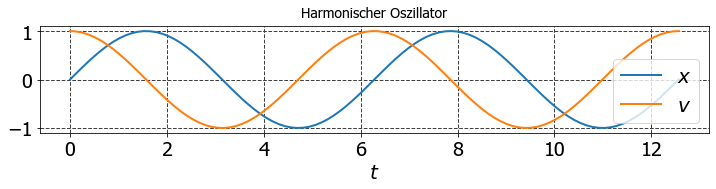

In [8]:
fig = plt.figure(figsize=(12, 12))

ax = fig.add_subplot(1, 1, 1, aspect=1)

ax.grid(linestyle="--", linewidth=1, color='.25', zorder=-10)

ax.plot(sol.t, sol.y[0],lw=2,label= '$x$')
ax.plot(sol.t, sol.y[1],lw=2,label= '$v$')

ax.set_title("Harmonischer Oszillator", fontsize=14, verticalalignment='bottom')
ax.set_xlabel("$t$")
#ax.set_ylabel("$x(t)$")
ax.legend(loc='lower right')

plt.show()

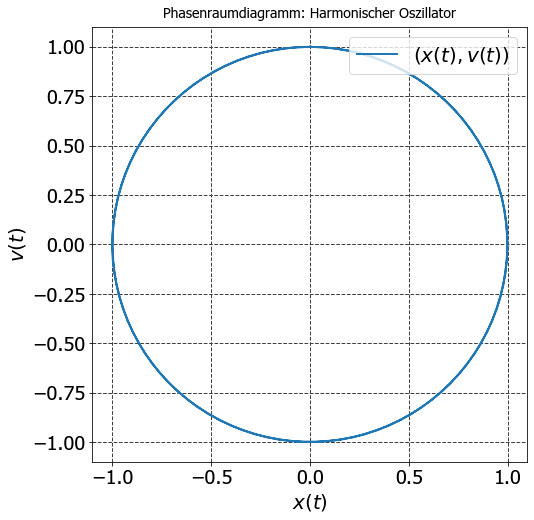

In [9]:
fig2 = plt.figure(figsize=(8, 8))
ax = fig2.add_subplot(1, 1, 1, aspect=1)

ax.grid(linestyle="--", linewidth=1, color='.25', zorder=-10)

ax.plot(sol.y[0],sol.y[1],lw=2,label= '$(x(t),v(t))$')

ax.set_title("Phasenraumdiagramm: Harmonischer Oszillator", fontsize=14, verticalalignment='bottom')
ax.set_xlabel("$x(t)$")
ax.set_ylabel("$v(t)$")
ax.legend(loc='upper right')

plt.show()